In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [40]:
def load_data(file_path: str):
    df = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return df

directory_path = 'DATA/VEX_MAGNETO'
file_name = 'VEX-V-Y-MAG-4.csv'

df = load_data(os.path.join(directory_path, file_name))
df.head()

,BX,BY,BZ,BT,XSC,YSC,ZSC,RSC
date,,,,,,,,
2006-04-24 00:00:00,12.357658,-1.304164,-3.332425,12.881274,-4451.055178,-3196.485753,-65466.762260,65695.760575
2006-04-24 00:05:00,12.868947,-0.980800,-3.360027,13.340680,-4202.246280,-3138.377907,-65806.350827,66015.078600
2006-04-24 00:10:00,12.857438,-0.871986,-3.487877,13.355384,-3954.000329,-3080.233288,-66137.913808,66327.612616
2006-04-24 00:15:00,12.898635,-0.684986,-2.885689,13.248405,-3705.057257,-3021.761270,-66463.291041,66635.079608
2006-04-24 00:20:00,12.766473,-0.517608,-2.217135,12.972905,-3453.676541,-2962.553108,-66784.717784,66939.596338


# Plot the data

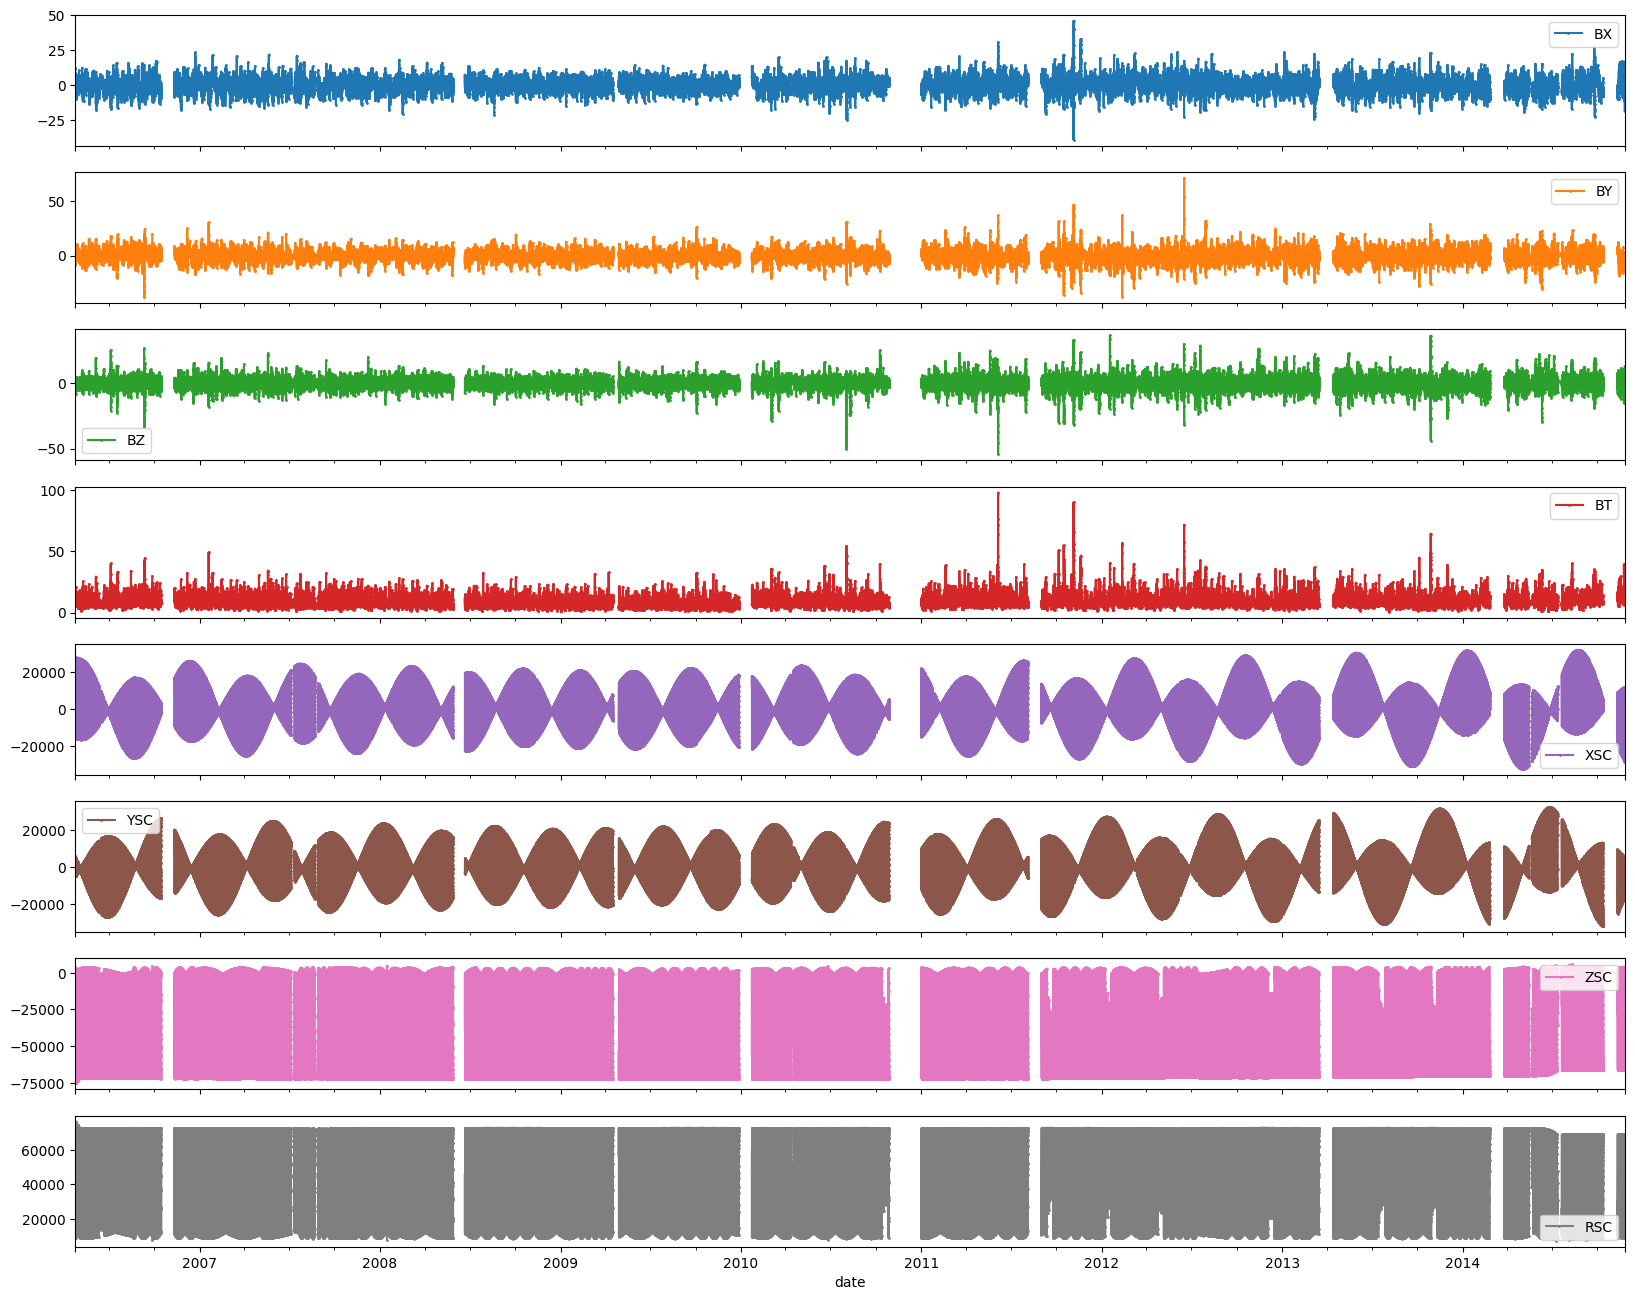

In [41]:
df_hourly = df.resample('h').mean()
df_hourly.plot(figsize=(20, 16), marker='o', markersize=1, subplots=True)
plt.show()

# Plot total magnetic field

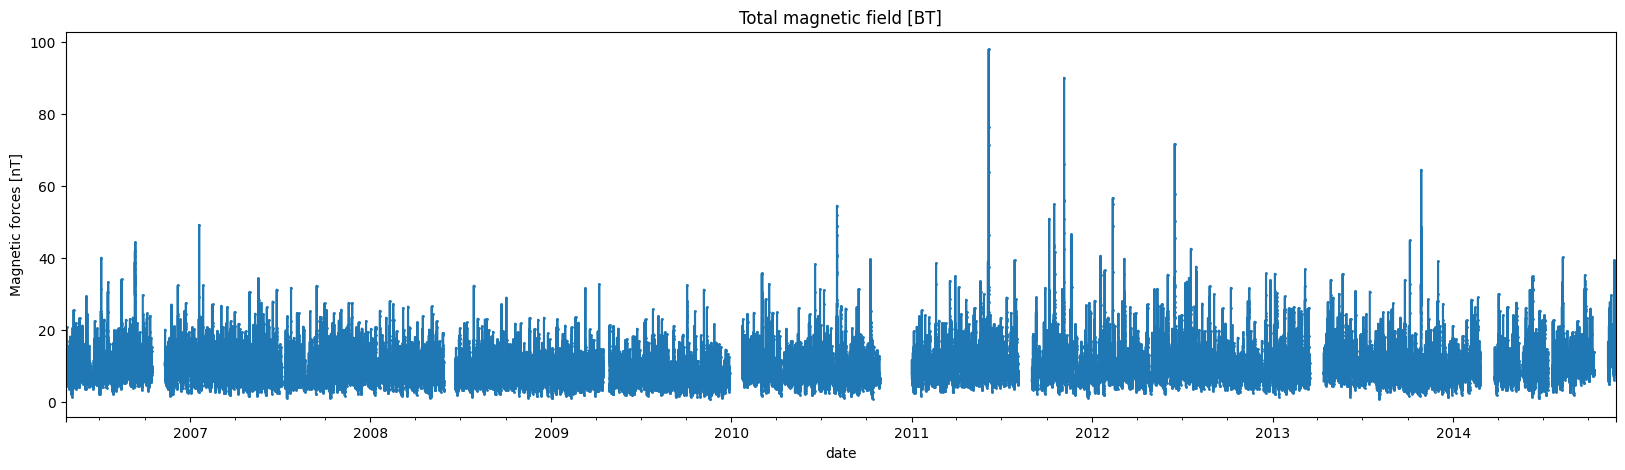

In [42]:
df_hourly['BT'].plot(figsize=(20, 5), marker='o', markersize=1, ylabel='Magnetic forces [nT]', title='Total magnetic field [BT]')
plt.show()

# Plot X-Y coordinates in solar coordinates

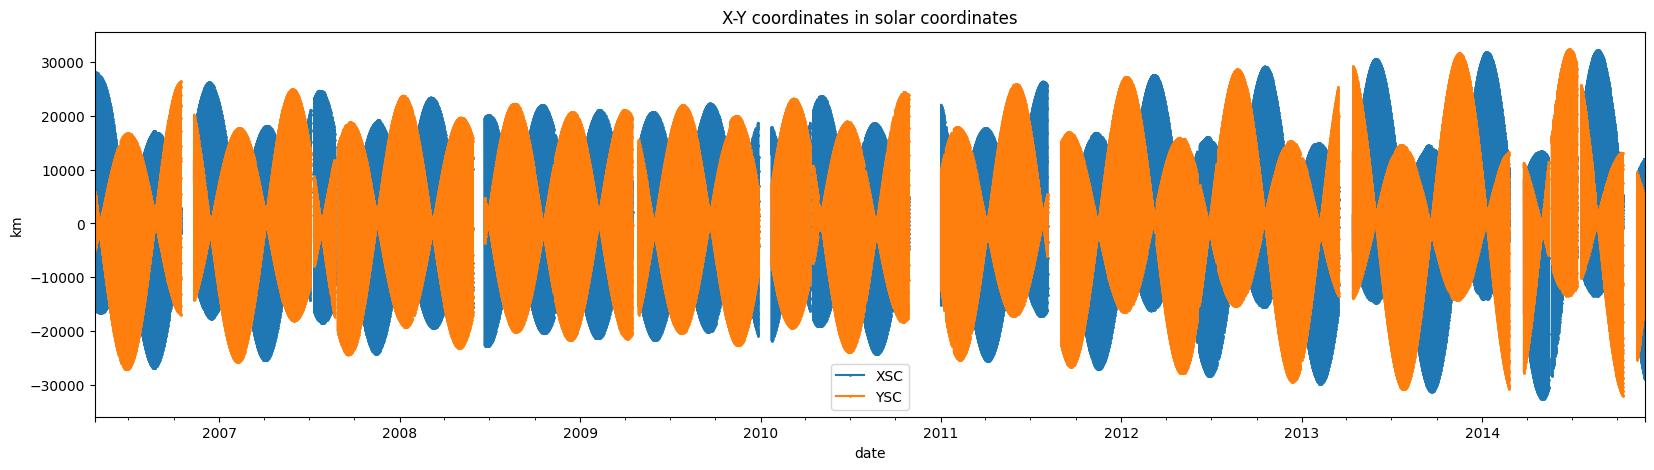

In [43]:
df_hourly[df_hourly.columns[4:6]].plot(figsize=(20, 5), marker='o', markersize=1, title= "X-Y coordinates in solar coordinates", ylabel="km")
plt.show()

# Plot the distance from the Sun

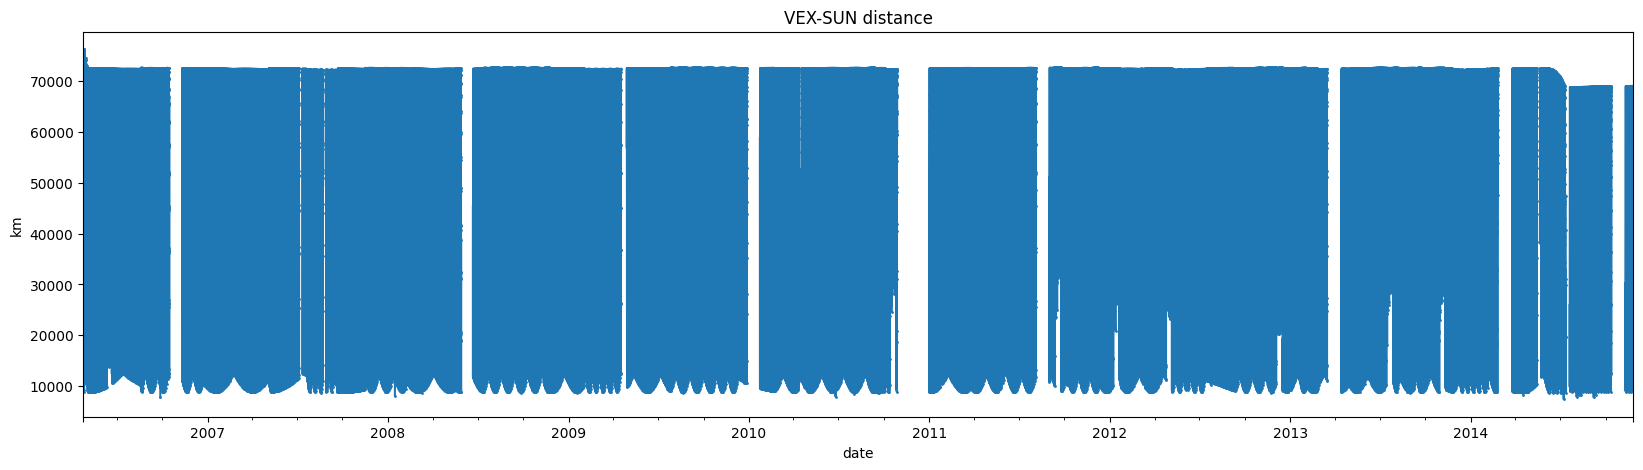

In [44]:
df_hourly['RSC'].plot(figsize=(20, 5), marker='o', markersize=1, title= "VEX-SUN distance", ylabel="km")
plt.show()

# PLot the magnetic field with the CME events

In [45]:
data_path = "DATA/VENUS_EXPRESS/"
csv_file_path = data_path + "VEX_CME_date_time.csv"
vex_boundary_df = pd.read_csv(csv_file_path)
vex_boundary_df['start_time'] = pd.to_datetime(vex_boundary_df['start_time'])
vex_boundary_df['end_time'] = pd.to_datetime(vex_boundary_df['end_time'])
vex_boundary_df.head()

,start_time,end_time
0,2007-02-13 04:48:00.000,2007-02-14 09:33:15.840
1,2007-04-27 00:14:24.000,2007-04-27 16:10:33.600
2,2007-05-06 00:43:12.000,2007-05-06 20:52:48.000
3,2007-05-24 19:12:00.000,2007-05-25 19:59:31.200
4,2007-06-16 02:15:21.600,2007-06-16 17:16:48.000


In [48]:
# Add cme column to magneto dataframe
from datetime import datetime, timedelta

# Set the year and day numbers
year = 2006
start_day = 253
end_day = 255

# Calculate the dates
start_date = datetime(year, 1, 1) + timedelta(days=start_day - 1)
end_date = datetime(year, 1, 1) + timedelta(days=end_day - 1)


sub_df = df.loc[start_date:end_date]
mag_cols = ['BX', 'BY', 'BZ', 'BT']

sub_df['cme'] = 0
value = sub_df[mag_cols].max()
for index, row in vex_boundary_df.iterrows():
    sub_df.loc[row['start_time']:row['end_time'], 'cme'] = value
sub_df.head()

/tmp/ipykernel_55404/3935713135.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['cme'] = 0


,BX,BY,BZ,BT,XSC,YSC,ZSC,RSC,cme
date,,,,,,,,,
2006-09-10 00:00:00,3.254173,3.828240,3.318467,6.454693,-23160.769227,13097.688280,-36399.772093,45088.003307,0
2006-09-10 00:05:00,2.838133,0.551013,6.537093,7.480133,-23132.682160,13061.627320,-35648.961627,44458.856453,0
2006-09-10 00:10:00,0.828107,3.399653,5.225760,6.717000,-23096.904320,13021.212987,-34886.288840,43818.796467,0
2006-09-10 00:15:00,-0.631360,3.343013,3.684373,6.187733,-23053.106693,12976.264560,-34111.491347,43167.560147,0
2006-09-10 00:20:00,-1.607440,-2.427120,-3.607960,4.652413,-23000.936947,12926.588573,-33324.293627,42504.870960,0


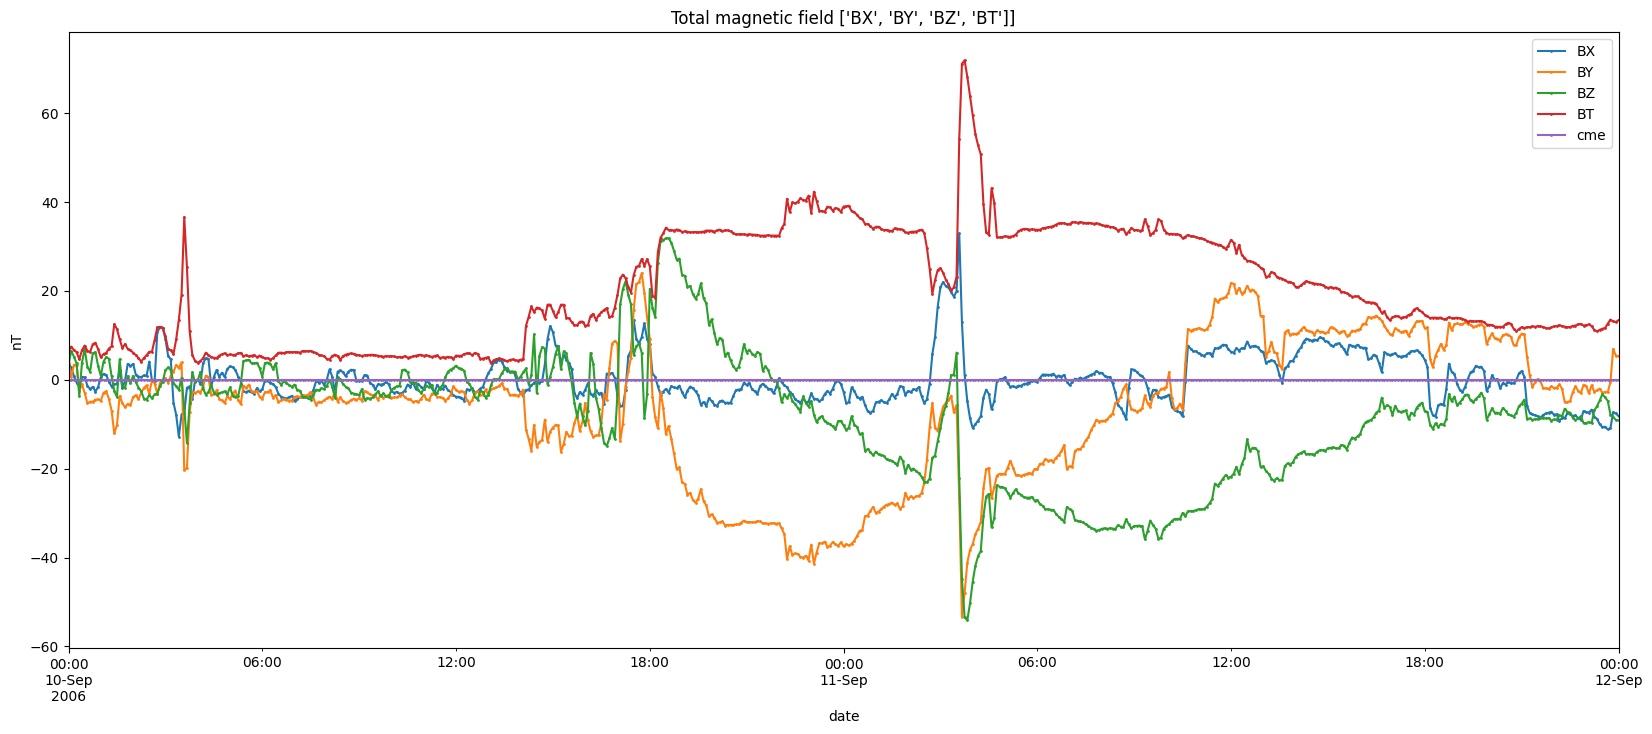

In [49]:
# Plot the magnetic field with the CME events
sub_df[mag_cols + ['cme']].plot(figsize=(20, 8), marker='o', markersize=1, title=f"Total magnetic field {mag_cols}]", ylabel="nT")
plt.show()